In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


#### Auto Regressive Models
#### Stationary Vs Non-Stationary

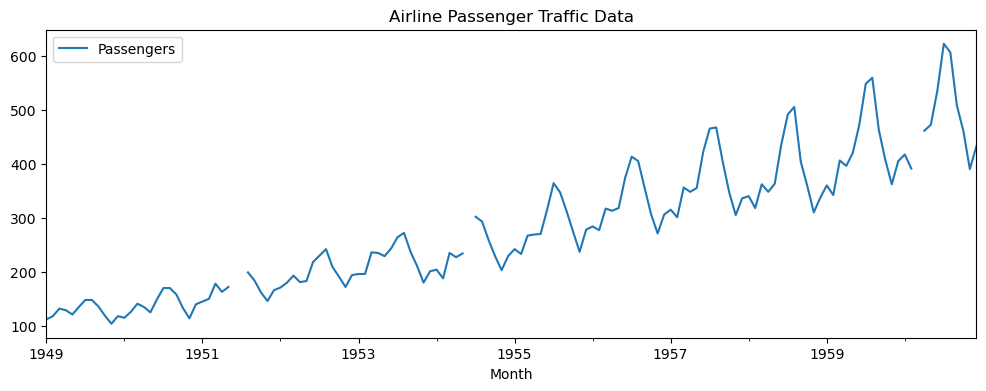

In [3]:
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show()

#### Missing value Treatment

In [4]:
data.Passengers = data.Passengers.interpolate(method='linear')

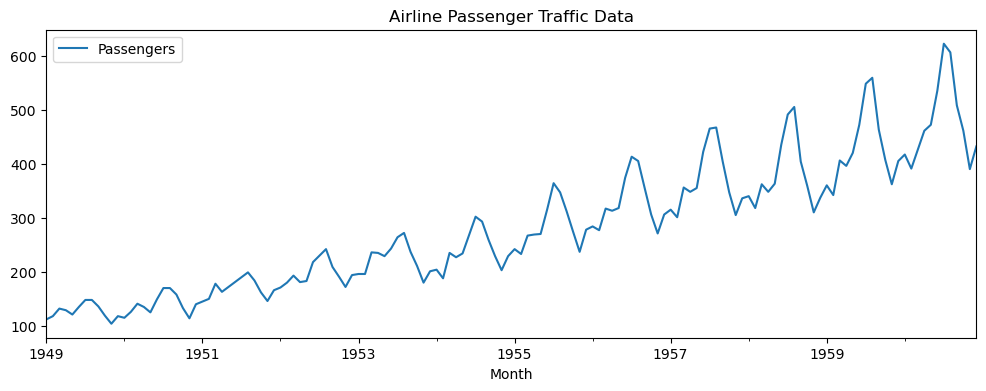

In [5]:
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show()

### Augmented Dickey_fuller(ADF) Test

In [6]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])
print('ADF statistics: %f'  %adf_test[0])
print('Critical Value %.2f' %adf_test[4]['5%'])
print('p-value %f' %adf_test[1])

ADF statistics: 0.894609
Critical Value -2.88
p-value 0.993020


In [7]:
from statsmodels.tsa.stattools import kpss

In [8]:
kpss_test = kpss(data['Passengers'])

print('KPSS statistics: %f'  %kpss_test[0])
print('Critical Value %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistics: 1.651190
Critical Value 0.46
p-value 0.010000


C:\Users\minak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [9]:
exercise = pd.read_csv('exchange-rate-twi.csv')
exercise = exercise.set_index('Month')

In [10]:
exercise.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [11]:
adf_test = adfuller(exercise['Exchange Rate TWI'])
print('ADF statistics: %f'  %adf_test[0])
print('Critical Value %.2f' %adf_test[4]['5%'])
print('p-value %f' %adf_test[1])

ADF statistics: -0.805468
Critical Value -2.87
p-value 0.817511


In [12]:
kpss_test = kpss(exercise['Exchange Rate TWI'])
print('KPSS statistics: %f'  %kpss_test[0])
print('Critical Value %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistics: 2.614489
Critical Value 0.46
p-value 0.010000


C:\Users\minak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Box Cox Transformation / Power Transformation

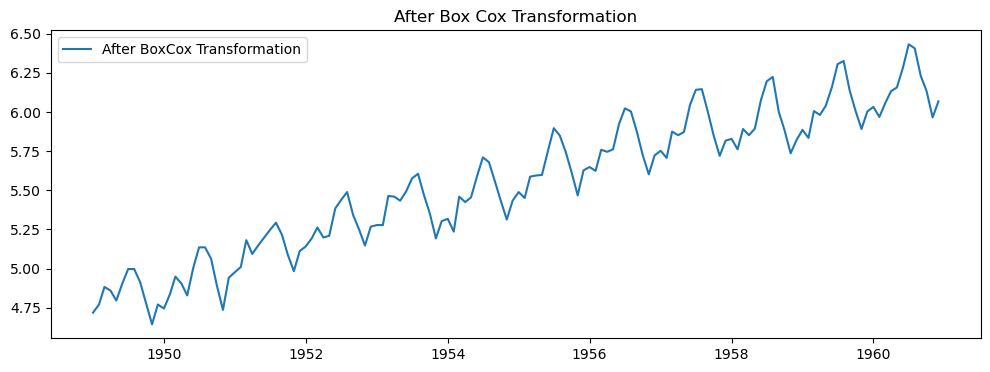

In [25]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index= data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After BoxCox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')
plt.show()

##### We have the Trend but we remove the variance - Box Cox for variance

#### Differencing

In [26]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index= data.index)
data_boxcox_diff.head()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: Passengers, dtype: float64

1st row contain NaN as there no data to take difference

In [27]:
data_boxcox_diff.dropna(inplace=True)

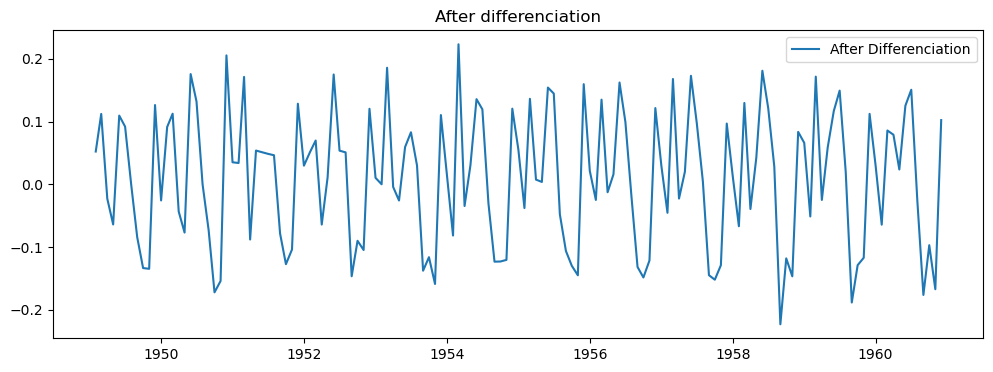

In [28]:

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Differenciation')
plt.legend(loc='best')
plt.title('After differenciation')
plt.show()

### ADSF and KPSS Test

In [29]:
adf_test = adfuller(data_boxcox_diff)
print('ADF statistics: %f'  %adf_test[0])
print('Critical Value %.2f' %adf_test[4]['5%'])
print('p-value %f' %adf_test[1])

ADF statistics: -3.290114
Critical Value -2.88
p-value 0.015326


IF Critical value > ADF statistics then we can reject Null Hypothesis. <br>
Augmented Dickey-Fuller (ADF) Test <br>
	• Null Hypothesis (H0): The series is not stationary<br>
		○ p−value>0.05<br>
	• Alternate Hypothesis (H1): The series is stationary<br>
        ○ p−value≤0.05<br>
this means Data is non (non stationay) = Stationary<br>

In [31]:
kpss_test = kpss(data_boxcox_diff)
print('KPSS statistics: %f'  %kpss_test[0])
print('Critical Value %.2f' %kpss_test[3]['5%'])
print('p-value %f' %kpss_test[1])

KPSS statistics: 0.038341
Critical Value 0.46
p-value 0.100000


C:\Users\minak\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


#### ACF/PACF Plot

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

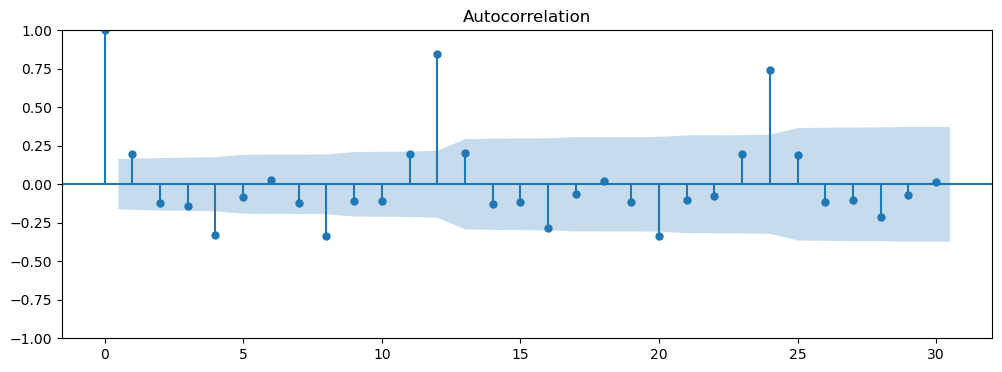

In [35]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [36]:
data_boxcox_diff.head(10)

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
Name: Passengers, dtype: float64

#### Split Train-Test Data set

In [38]:
train_len = 29
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### AR - Auto Regressor

In [47]:
import statsmodels.api as sm
#from statsmodels.tsa.arima.model import ARIMA

In [48]:
model = sm.tsa.arima.ARIMA(train_data_boxcox_diff, order=(1,0,0)) #(AR,)
model_fit = model.fit()
print(model_fit.params)

const     0.015587
ar.L1     0.091719
sigma2    0.011109
dtype: float64


C:\Users\minak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\minak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\minak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Recover Original Time series Forecast

In [49]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_cumsum'] = y_hat_ar['ar_forecast'].cumsum()
y_hat_ar['ar_forecast_cumsum'] = y_hat_ar['ar_forecast_cumsum'].add(data_boxcox[0])
y_hat_ar['ar_original_forecast'] = np.exp(y_hat_ar['ar_forecast_cumsum'])

In [50]:
y_hat_ar.head()

Month
1949-02-01 00:00:00    0.052186
1949-03-01 00:00:00    0.112117
1949-04-01 00:00:00    -0.02299
1949-05-01 00:00:00   -0.064022
1949-06-01 00:00:00    0.109484
Name: Passengers, dtype: object